In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy.optimize import linprog
import math
import pulp
from sympy.solvers.diophantine import diophantine
from sympy import symbols
import random
import time


# Tarifa con espacio entre vehículo observando a un único vehículo


In [4]:
def f(m):
    distanciaAumentada = m + 0.3
    return 600000/(3*math.floor(52/distanciaAumentada))


tarifaAuto = math.ceil(f(5))
print(tarifaAuto)
tarifaBus=math.ceil(f(12))
print(tarifaBus)
tarifaMinibus=math.ceil(f(7))
print(tarifaMinibus)


22223
9091
50000
28572


# Tarifa especial motos

In [9]:
def g(m):
    distanciaAumentada = m + 0.3
    return 600000/(9*math.floor(52/distanciaAumentada))
print(math.ceil(g(2)))
tarifaMoto = g(2)


3031


In [25]:
class Mundo:
    def __init__(self, autos,buses,minibuses, motos):
        self.autos = autos*6
        self.buses= buses*15
        self.minibuses = minibuses*9
        self.motos = motos


objeto = Mundo(0,13,0,0)        

print(objeto.autos)
print(objeto.buses)

def mundoEnMotos(autos,buses,minibuses):
    if autos !=0:
        return autos*6
    if buses !=0:
        return buses*15
    if minibuses !=0:
        return minibuses*9

    
mundoEnMotos(0,2,0)

def gananciaTotal(autos,buses,motos,minibuses):
    #return autos*18200+buses*46200+minibuses*27300+3100*motos
    return autos*23000+buses*50000+minibuses*29000+3100*motos

def superficieTotal(autos,buses,motos,minibuses):
    superficieTotal = 546
    print("espacio ocupado: "+str(autos*6*2.457 + buses*15*2.475 + minibuses*9*2.475  + motos*2.475))
    ocupado = autos*6*2.457 + buses*15*2.475 + minibuses*9*2.475  + motos*2.475 
    if ocupado <superficieTotal and ocupado>530:
        print("Entra en el ferry")
        print("ganancia: "+str(gananciaTotal(autos,buses,motos,minibuses)))  
    if autos*6*2.457 + buses*15*2.475 + minibuses*9*2.475  + motos*2.475 <superficieTotal:
        print("Sobra espacio")
    else:
        print("no entra en el ferry")



#print(superficieTotal(0,13,0,0))
print(superficieTotal(6,7,12,7))


0
195
espacio ocupado: 533.952
Entra en el ferry
ganancia: 728200
Sobra espacio
None


In [43]:
A = np.array([[5],[2],[12],[7]])
B = np.array([3100,43400,27300,18200])

A*B

array([[ 15500, 217000, 136500,  91000],
       [  6200,  86800,  54600,  36400],
       [ 37200, 520800, 327600, 218400],
       [ 21700, 303800, 191100, 127400]])

In [12]:
obj = [-5,-2,-12,-7]#5x+2y+12z+7w <= 156
lhs_ineq = [[5,2,12,7]]
rhs_ineq = [156]   
bnd = [(0, float("inf")),(0, float("inf")),(0, float("inf")),(0, float("inf"))]
p  = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)
p.x


array([4.04987157, 3.84908989, 8.22819457, 4.18773251])

In [9]:
w, x, y, z = symbols("w, x, y, z", integer=True)#ax+by+cz=k
#diophantine(2*x + 3*y - 5)
diophantine(5*x+2*y+12*z+7*w-156)

{(t_0, -5*t_0 + 2*t_1 + 156, 15*t_0 + t_1 + 6*t_2 - 312, -t_0 - t_1 - t_2)}

In [13]:
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)
x = pulp.LpVariable('x', lowBound=0, cat='Integer')
y = pulp.LpVariable('y', lowBound=0, cat='Integer')
z = pulp.LpVariable('z', lowBound=0, cat='Integer')
w = pulp.LpVariable('w', lowBound=0, cat='Integer')
model += 5 * x + 2 * y + 12*z + 7*w,  "Profit"

# Constraints
model += 5 * x + 2 * y + 12*z + 7*w <= 156


C:\Users\Cesar\anaconda3\lib\site-packages\pulp\pulp.py:1195: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [122]:
METRO = 4200
AUTO = 5
MOTO = 2
BUS = 13
MINIBUS = 8
COLUMNA = 52 
METROSTOTALES = COLUMNA*3
def obtenerSobrante(longitud):
    return COLUMNA%longitud
sobranteAuto, sobranteMoto, sobranteBus,sobranteMinibus = obtenerSobrante(AUTO),obtenerSobrante(MOTO),obtenerSobrante(BUS),obtenerSobrante(MINIBUS)
 
def obtenerGanancia(sobrante):
    return (METROSTOTALES - 3*sobrante)*4200

def gananciaMoto(sobrante):
    return (METROSTOTALES - 3*sobrante)*4200*3

gananciaAuto, gananciaMoto, gananciaBus, gananciaMinibus = obtenerGanancia(sobranteAuto),gananciaMoto(sobranteMoto), obtenerGanancia(sobranteBus), obtenerGanancia(sobranteMinibus)

def determinarTarifa(vehículo):
    return vehículo*4200

tarifas = dict({"tarifa Auto":determinarTarifa(AUTO), "tarifa Moto":determinarTarifa(MOTO),"tarifa Bus":determinarTarifa(BUS),"tarifa Minibus":determinarTarifa(MINIBUS)})
for tarifa in tarifas:
    print(tarifa, "--> $",tarifas[tarifa])
    
def obtenerGanancia(nAutos,nMotos,nBuses,nMinibuses):
    ganancia = nAutos*tarifas["tarifa Auto"] +nMotos*tarifas["tarifa Moto"]+nBuses*tarifas["tarifa Bus"]+ nMinibuses*tarifas["tarifa Minibus"]
    longitudTotal = nAutos*AUTO +nMotos*MOTO/3 +nBuses*BUS +nMinibuses*MINIBUS
    
    
    if longitudTotal > METROSTOTALES:
        diferencia = longitudTotal - METROSTOTALES
        print(f"no hay suficiente espacio. Diferencia: {diferencia} metros")
        print(f"ganancia: {ganancia}")
    if longitudTotal <  METROSTOTALES and longitudTotal > 146:
        print(f"longitud final: {longitudTotal}")
        print("ferry lleno")
        print(f"ganancia: {ganancia}")
    if longitudTotal <  METROSTOTALES and longitudTotal < 146:
        print(f"longitud final: {longitudTotal}")
        print("ferry sobra espacio")
        print(f"ganancia: {ganancia}")
print(obtenerGanancia(6,27,5,5))

def obtenerGananciaColumna(nAutos,nMotos,nBuses,nMinibuses):
    ganancia = nAutos*tarifas["tarifa Auto"] +nMotos*tarifas["tarifa Moto"]+nBuses*tarifas["tarifa Bus"]+ nMinibuses*tarifas["tarifa Minibus"]
    longitudTotal = nAutos*AUTO +nMotos*MOTO/3 +nBuses*BUS +nMinibuses*MINIBUS
    print(longitudTotal)
    if longitudTotal > COLUMNA:
        diferencia = longitudTotal - COLUMNA
        print(f"no hay suficiente espacio. Diferencia: {diferencia} metros")
        print(f"ganancia: {ganancia}")
    if longitudTotal <=  COLUMNA and longitudTotal >= 48:
        print(f"longitud final: {longitudTotal}")
        print("columna llena")
        print(f"ganancia: {ganancia}")
    if longitudTotal <  COLUMNA and longitudTotal < 48:
        print(f"longitud final: {longitudTotal}")
        print("columna sobra espacio")
        print(f"ganancia: {ganancia}")
print("----------")     
print(obtenerGananciaColumna(0,78,0,0))

tarifa Auto --> $ 21000
tarifa Moto --> $ 8400
tarifa Bus --> $ 54600
tarifa Minibus --> $ 33600
longitud final: 153.0
ferry lleno
ganancia: 793800
None
----------
52.0
longitud final: 52.0
columna llena
ganancia: 655200
None


In [12]:
obj = [21000,8400,54600,29400]#4200x+4200y+4200z+4200w >= 600.000
lhs_ineq = [[-21000,-8400,-54600,-29400]]
rhs_ineq = [-600000]   
bnd = [(5, float("inf")),(5, float("inf")),(5, float("inf")),(5, float("inf"))]
p  = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)
p


     con: array([], dtype=float64)
     fun: 600000.0000002631
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.63098627e-07])
  status: 0
 success: True
       x: array([5.34551285, 5.45855789, 5.24329977, 5.29279512])

# Demostración para el primer modelo

In [15]:
obj = [-21000,-8400,-54600,-33600]

#21000x+8400y+54600z+33600w =f(x,y,z,w), minimizar 

lhs_ineq = [[-5,-2/3,-13,-8],[5,2/3,13,8],[21000,8400,54600,33600]]

"""
-5x-2y-12z-7 <= -146 (5x+2y+12z+7w >= 146)
5x+2y+12z+7w <= 156
21000x+8400y+54600z+33600w <= 600.000
--> estoy buscando solucion que cumpla con la longitud maxima y que cumpla de un precio 
    menor al minimo --> busco casos donde el sistema falle
    --> si es que no da resultados, significa que NO HAY casos donde el sistema falle
        --> por lo que siempre funcionara ! :D
"""

rhs_ineq = [-146,156,600000]   
bnd = [(0, float("inf")),(0, float("inf")),(0, float("inf")),(0, float("inf"))]
p  = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)
print(p)
print(p.x[0])

print(obtenerGanancia(p.x[0],p.x[1],p.x[2],p.x[3]))

     con: array([], dtype=float64)
     fun: 258173.54804331472
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 5
   slack: array([-8.51663529e+01,  9.51663529e+01,  3.41826452e+05])
  status: 2
 success: False
       x: array([7.7374154 , 0.22141285, 0.34102818, 2.23832791])
7.737415398804495
longitud final: 61.174675263247536
ferry sobra espacio
ganancia: 256933.63610563966
None


# Demostración para el primer modelo por columna

In [124]:

obj = [-21000,-8400,-54600,-33600]


lhs_ineq = [[-5,-2/3,-13,-8],[5,2/3,13,8],[21000,8400,54600,33600]]
rhs_ineq = [-48,52,200000]   
bnd = [(0, float("inf")),(0, float("inf")),(0, float("inf")),(0, float("inf"))]
p  = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)
print(p)
print(p.x[0])

print(obtenerGanancia(p.x[0],p.x[1],p.x[2],p.x[3]))




     con: array([], dtype=float64)
     fun: -141618.69562830936
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 11
   slack: array([-1.43947827e+01,  1.83947827e+01,  5.83813044e+04])
  status: 2
 success: False
       x: array([1.19033072, 0.0851398 , 2.10570434, 0.02783093])
1.1903307175248412
longitud final: 33.60521731595714
ferry sobra espacio
ganancia: 141618.69562830933
None
     con: array([], dtype=float64)
     fun: -195920.39093701742
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 9
   slack: array([-1.15198832e+00,  1.15198832e+00,  4.07960906e+03])
  status: 2
 success: False
       x: array([0.87213747, 0.01384824, 0.81702968, 4.48208829])
0.8721374697709119
longitud final: 50.848011679302964
ferry sobra espacio
ganancia: 213639.19917772137
None


# Demostración para el segundo modelo por columna


In [82]:
obj = [-20100,-7700,-50100,-33400]
lhs_ineq = [[-5,-2/3,-13,-8],[5,2/3,13,8],[20100,7700,50100,33400]]
rhs_ineq = [-48,52,200000]   
bnd = [(0, float("inf")),(0, float("inf")),(0, float("inf")),(0, float("inf"))]
p  = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd)
print(p)
print(p.x[0])


     con: array([], dtype=float64)
     fun: -200000.00000011083
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 1.38029239e+00,  2.61970761e+00, -1.10827386e-07])
  status: 0
 success: True
       x: array([1.55556067, 0.96716625, 2.32632222, 1.33944033])
1.5555606746001747


In [8]:
class Auto:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
    
    

class Minibus:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
    


    
def obtenerGananciaRandom():
    autos,motos,buses,minibuses = 0,0,0,0
    objAutos = []
    objMinibuses = []
    cantidadVehiculos = autos+motos+buses+minibuses
    if cantidadVehiculos == 0:
        cantidadVehiculos = 1
        
    promedioAuto = 100*autos/cantidadVehiculos
    promedioMoto = 100*motos/cantidadVehiculos
    promedioBuses = 100*buses/cantidadVehiculos
    promedioMinibuses = 100*minibuses/cantidadVehiculos
    while 5*autos + 2/3*motos + 13*buses+ 8*minibuses > 52 or 5*autos + 2/3*motos + 13*buses+ 8*minibuses < 48:
        
        autos = random.randint(4,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        
    else:
        for auto in range(autos):
            objAutos.append(Auto(random.randint(1,6)))#max = 9
            #objAutos.append(Auto(1))
        for minibus in range(minibuses):
            objMinibuses.append(Minibus(random.randint(1,15)))
            #objMinibuses.append(Minibus(1))
        dineroExtraAutos = []
        dineroExtraMinibuses = []
        for auto in objAutos:
            #print(f"pasajeros del auto numero {objAutos.index(auto)+1}: {auto.pasajeros}")
            dineroExtraAutos.append(800*auto.pasajeros-500*(auto.pasajeros-1))
        for minibus in objMinibuses:
            #print(f"pasajeros del minibus numero {objMinibuses.index(minibus)+1}: {minibus.pasajeros}")
            dineroExtraMinibuses.append(2600*minibus.pasajeros-2500*minibus.pasajeros-2500)
        tarifaAuto = 19300
        tarifaMoto = 7700
        tarifaBus = 50100
        tarifaMinibus = 30800
        #print(f"autos: {autos}, buses:{buses}, minibuses:{minibuses}, motos:{motos}")
        
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
        gananciaTotal = sum(dineroExtraMinibuses) + sum(dineroExtraAutos) + gananciaBase
        #print(f"ganancia de la columna: ${gananciaTotal}")
        return gananciaTotal  



intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(50000):
    ganancia = obtenerGananciaRandom()
    if ganancia < 200000:
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000:
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos)
bueno = sum(intentosBuenos)
razon = fallido/bueno
print(f"fallido: {fallido}")
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print(3*sum(ganancias)/len(ganancias)-600000)
print("gol de maradona")


fallido: 8768
acertado: 41232
razon = 0.21265036864571207
20329.043999999994
gol de maradona


In [6]:
from __future__ import print_function
from ortools.linear_solver import pywraplp


solver = pywraplp.Solver.CreateSolver('SCIP')



infinity = solver.infinity()
# x and y are integer non-negative variables.
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')
z = solver.IntVar(0.0, infinity, 'z')
w = solver.IntVar(0.0, infinity, 'w')


solver.Add(20100*x + 7700 *y + 50100*z + 33400*w  >=0)
solver.Add(-5*x-2/3*y -13*z-8*w <= -48 )
solver.Add(5*x+2/3*y +13*z+8*w <= 52 )  
solver.Minimize(20100*x + 7700 *y + 50100*z + 33400*w)
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
    print('z =', z.solution_value())
    print('w =', w.solution_value())
    
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 190500.0
x = 2.0
y = 0.0
z = 3.0
w = 0.0


In [11]:
from __future__ import print_function
from ortools.linear_solver import pywraplp


solver = pywraplp.Solver.CreateSolver('SCIP')

infinity = solver.infinity()
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')
z = solver.IntVar(0.0, infinity, 'z')
w = solver.IntVar(0.0, infinity, 'w')
#definimos los intervalos para las variables x,y,z,w. (de cero a infinito)
#IntVar dice que solo son números enteros.

solver.Add(21000*x + 8400 *y + 54600*z + 33600*w  >= 0)
solver.Add( -5*x-2/3*y -13*z-8*w <= -48 )
solver.Add( 5*x+2/3*y +13*z+8*w <= 52 )  
#inecuaciones que restringen
solver.Minimize(21000*x + 8400 *y + 54600*z + 33600*w)
#minimizar la función 21000*x + 8400 *y + 54600*z + 33600*w 
status = solver.Solve()
#resolver 
if status == pywraplp.Solver.OPTIMAL: #si se encuentra una solución, entonces se dan las soluciones. 
    print('Solución:')
    print('Ganancia mínima =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
    print('z =', z.solution_value())
    print('w =', w.solution_value())
    
else: #si no se encuentra una solución, se avisa. 
    print('El problema no tiene una solución.')

Solución:
Ganancia mínima = 201599.99999999997
x = 0.0
y = 0.0
z = 0.0
w = 6.0


In [1]:
from __future__ import print_function
from ortools.linear_solver import pywraplp


solver = pywraplp.Solver.CreateSolver('SCIP')



infinity = solver.infinity()
# x and y are integer non-negative variables.
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')
z = solver.IntVar(0.0, infinity, 'z')
w = solver.IntVar(0.0, infinity, 'w')


#solver.Add(20400*x + 8400 *y + 5400*z + 30400*w  <= 200000)
solver.Add(20100*x + 7700 *y + 51000*z + 33400*w  <= 200000)
solver.Add( -5*x-2/3*y -13*z-8*w <= -48 )
solver.Add( 5*x+2/3*y +13*z+8*w <= 52 )  

#solver.Minimize(20400*x + 8400 *y + 50400*z + 30400*w)
solver.Minimize(20100*x + 7700 *y + 51000*z + 33400*w)
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
    print('z =', z.solution_value())
    print('w =', w.solution_value())
    
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 191700.00000000003
x = 7.0
y = 0.0
z = 1.0
w = 0.0


In [9]:
class Auto:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
    
    

class Minibus:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
    


    
def obtenerGananciaRandom():
    autos,motos,buses,minibuses = 0,0,0,0
    objAutos = []
    objMinibuses = []
    while 5*autos + 2/3*motos + 13*buses+ 8*minibuses > 52 or 5*autos + 2/3*motos + 13*buses+ 8*minibuses < 48:
        
        autos = random.randint(5,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        
    else:
        for auto in range(autos):
            objAutos.append(Auto(random.randint(1,4)))#max = 9
            #objAutos.append(Auto(1))
        for minibus in range(minibuses):
            objMinibuses.append(Minibus(random.randint(1,15)))#15
            
            #objMinibuses.append(Minibus(1))
        dineroExtraAutos = []
        dineroExtraMinibuses = []
        for auto in objAutos:
            #print(f"pasajeros del auto numero {objAutos.index(auto)+1}: {auto.pasajeros}")
            dineroExtraAutos.append(100*(auto.pasajeros-1))
            
        for minibus in objMinibuses:
            #print(f"pasajeros del minibus numero {objMinibuses.index(minibus)+1}: {minibus.pasajeros}")
            dineroExtraMinibuses.append(300*(minibus.pasajeros-1))
        tarifaAuto = 20100
        tarifaMoto = 7700
        tarifaBus = 50100 
        tarifaMinibus = 33400
        #print(f"autos: {autos}, buses:{buses}, minibuses:{minibuses}, motos:{motos}")
        
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
        #print(gananciaBase)
        gananciaTotal = sum(dineroExtraMinibuses) + sum(dineroExtraAutos) + gananciaBase
        #print(f"ganancia de la columna: ${gananciaTotal}")
        return gananciaTotal  


    

intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(50000):
    ganancia = obtenerGananciaRandom()
    if ganancia < 200000:
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000:
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos)
bueno = sum(intentosBuenos)
razon = fallido/bueno
print(f"fallido: {fallido}")
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print(sum(ganancias)/len(ganancias))
print("gol de maradona")



fallido: 5488
acertado: 44512
razon = 0.12329259525521208
210611.0128
gol de maradona


In [4]:
  
"""
función que retorna la ganancia de un trayecto con una cantidad random de vehículos, 
que llenan a una hilera.

"""
def obtenerGananciaRandom():
    autos,motos,buses,minibuses = 0,0,0,0 
    
    while 5*autos + 2/3*motos + 13*buses+ 8*minibuses > 52 or 5*autos + 2/3*motos + 13*buses+ 8*minibuses < 48:
        #asigna catidades de vehículos hasta que llenen la fila
        autos = random.randint(5,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        
    else:
         
        tarifaAuto = 21000
        tarifaMoto = 8400
        tarifaBus = 54600
        tarifaMinibus = 33600
        #calcula la ganancia
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
        return gananciaBase  


    

intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(50000): #simula 50.000 viajes
    ganancia = obtenerGananciaRandom()
    if ganancia < 200000: #guarda las pérdidas
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000: #guarda las ganancias
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos) #suma las pérdidas
bueno = sum(intentosBuenos) #suma las ganancias
razon = fallido/bueno #da la razón entre pérdidas y ganancias
print(f"fallido: {fallido}") 
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print(sum(ganancias)/len(ganancias)) #da el promedio entre ganancias y pérdidas por columna luego de 50.000 intentos




fallido: 0
acertado: 50000
razon = 0.0
216288.072
gol de maradona


In [11]:


    
def obtenerGananciaRandom():
    autos,motos,buses,minibuses = 0,0,0,0
    a,m,b,n= random.randint(3,6),random.randint(1,3),random.randint(11,13),random.randint(7,10)
    while a*autos + 2/3*m*motos + b*buses+ n*minibuses > 52 or a*autos + 2/3*m*motos + b*buses+ n*minibuses < 48:
        
        autos = random.randint(5,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        a,m,b,n= random.randint(3,6),random.randint(1,3),random.randint(11,13),random.randint(7,10)
        
    else:
         
        tarifaAuto = 21000
        tarifaMoto = 8400
        tarifaBus = 54600
        tarifaMinibus = 33600
        #print(f"autos: {autos}, buses:{buses}, minibuses:{minibuses}, motos:{motos}")
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
        return gananciaBase  


    

intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(50000):
    ganancia = obtenerGananciaRandom()
    if ganancia < 200000:
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000:
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos)
bueno = sum(intentosBuenos)
razon = fallido/bueno
print(f"fallido: {fallido}")
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print(sum(ganancias)/len(ganancias))
print("gol de maradona")


fallido: 9059
acertado: 40941
razon = 0.22126963190933294
236201.7
gol de maradona


In [12]:
import random 
class Auto:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
"""
Define a un auto, que tendrá como atributo su cantidad de pasajeros

"""
    
def obtenerGananciaRandom(): 
#esta función nos da la ganancia por viaje, con una cantidad random de vehículos, pero que llenen la columna
    autos,motos,buses,minibuses = 0,0,0,0 
    objAutos = []
    while 5*autos + 2/3*motos + 13*buses+ 8*minibuses > 52 or 5*autos + 2/3*motos + 13*buses+ 8*minibuses < 48:
        #asigna valores random a los vehículos hasta que llenen la columna
        autos = random.randint(5,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        
    else:
        for auto in range(autos):
            objAutos.append(Auto(random.randint(1,5)))#max = 9
         #le asigna una cantidad random de pasajeros a los autos, pero acotada de 1 a 5
        dineroExtraAutos = []
        for auto in objAutos:
            dineroExtraAutos.append(500*(auto.pasajeros-1))
        #calcula el cobro extra para cada auto dependiendo de su numero de pasajeros
        tarifaAuto = 19300
        tarifaMoto = 7700
        tarifaBus = 50100 
        tarifaMinibus = 33400
       
        
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
       #ganancia no incluuye a lo extra de los autos
        gananciaTotal = sum(dineroExtraAutos) + gananciaBase
        #ganancia si incluuye a lo extra de los autos
        return gananciaTotal  


    

intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(50000): #hace 50.000 viajes
    ganancia = obtenerGananciaRandom()
    if ganancia < 200000: #guarda los intentos que dan pérdidas
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000: #guarda los intentos que dan ganancias
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos) #suma pérdidas
bueno = sum(intentosBuenos) #suma ganancias
razon = fallido/bueno    #razón entre pérdidas y ganancias
print(f"fallido: {fallido}") 
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print(sum(ganancias)/len(ganancias))



fallido: 8462
acertado: 41538
razon = 0.20371707833790745
207502.918
gol de maradona


fallido: 173
acertado: 827
razon = 0.20918984280532044
promedio de las ganancias: 207708.1
desviación estándar: 7542.840236199414
Ganancia máxima: 224400
Ganancia mínima: 188700


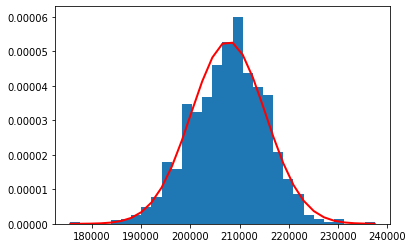

In [13]:
import matplotlib.pyplot as plt
import random 
import time 
import statistics 
import numpy as np


class Auto:
    def __init__(self,pasajeros):
        self.pasajeros = pasajeros
"""
Define a un auto, que tendrá como atributo su cantidad de pasajeros

"""
    
def obtenerGananciaRandom2(): 
#esta función nos da la ganancia por viaje, con una cantidad random de vehículos, pero que llenen la columna
    autos,motos,buses,minibuses = 0,0,0,0 
    objAutos = []
    while 5*autos + 2/3*motos + 13*buses+ 8*minibuses > 52 or 5*autos + 2/3*motos + 13*buses+ 8*minibuses < 48:
        #asigna valores random a los vehículos hasta que llenen la columna
        autos = random.randint(5,9)#1,10
        motos = random.randint(0,3)#78
        buses = random.randint(0,2)
        minibuses = random.randint(0,2)
        
    else:
        for auto in range(autos):
            objAutos.append(Auto(random.randint(1,5)))#max = 9
         #le asigna una cantidad random de pasajeros a los autos, pero acotada de 1 a 5
        dineroExtraAutos = []
        for auto in objAutos:
            dineroExtraAutos.append(500*(auto.pasajeros-1))
        #calcula el cobro extra para cada auto dependiendo de su numero de pasajeros
        tarifaAuto = 19300
        tarifaMoto = 7700
        tarifaBus = 50100 
        tarifaMinibus = 33400
       
        
        gananciaBase = autos*tarifaAuto+motos*tarifaMoto+buses*tarifaBus+minibuses*tarifaMinibus
       #ganancia no incluuye a lo extra de los autos
        gananciaTotal = sum(dineroExtraAutos) + gananciaBase
        #ganancia si incluuye a lo extra de los autos
        return gananciaTotal  


    

intentosBuenos = []
intentosMalos = []
ganancias = []
for i in range(1000): #hace 50.000 viajes
    ganancia = obtenerGananciaRandom2()
    if ganancia < 200000: #guarda los intentos que dan pérdidas
        intentosMalos.append(1)
        ganancias.append(ganancia)

    elif ganancia >=200000: #guarda los intentos que dan ganancias
        intentosBuenos.append(1)
        ganancias.append(ganancia)
        
fallido = sum(intentosMalos) #suma pérdidas
bueno = sum(intentosBuenos) #suma ganancias
razon = fallido/bueno    #razón entre pérdidas y ganancias
print(f"fallido: {fallido}") 
print(f"acertado: {bueno}")
print(f"razon = {razon}")
    
print("promedio de las ganancias: "+str(statistics.mean(ganancias)))
print("desviación estándar: "+str(statistics.stdev(ganancias)))
print(f"Ganancia máxima: {max(ganancias)}")
print(f"Ganancia mínima: {min(ganancias)}")
mu, sigma = statistics.mean(ganancias), statistics.stdev(ganancias)
s = np.random.normal(mu, sigma, 1000)#para usar desviación estándar debería poder entender lo que las constantes en
#estas lineas funcionan (el 1000, el 80)
count, bins, ignored = plt.hist(s, 30, density=True)#el 15 representa la frecuencia
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()
